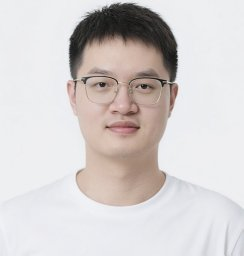
# Ling Yang

# Diffusion Models: A Comprehensive Survey of Methods and Applications

# https://arxiv.org/pdf/2209.00796

## Abstract
This paper presents a comprehensive survey of diffusion models as a class of generative models that construct complex data distributions through iterative denoising processes. It unifies denoising diffusion probabilistic models, score-based generative models, and stochastic differential equation formulations under a common theoretical framework. The survey systematically reviews foundational principles, training objectives, sampling strategies, likelihood improvements, structural extensions, and a wide range of applications across vision, language, multimodal generation, temporal data, and scientific domains.

## Problems
The paper identifies several core challenges in diffusion modeling:
1. **Sampling inefficiency** due to the large number of denoising steps required for high-quality generation.
2. **Suboptimal likelihood estimation**, as the variational lower bound used in training may be loose.
3. **Limited adaptability to structured data**, including discrete spaces, manifolds, equivariant domains, and graphs.
4. **Fragmentation of theory**, with multiple formulations (DDPMs, score matching, SDEs) historically treated as separate models.
5. **Practical deployment barriers**, including high computational cost and difficulty in conditioning and control.

## Proposed Solutions
The survey organizes existing solutions into coherent categories:
- Efficient sampling via deterministic solvers, truncated diffusion, optimized discretization, and knowledge distillation.
- Likelihood improvement through noise schedule optimization, reverse variance learning, and exact likelihood computation.
- Structural extensions for discrete data, invariant and equivariant data, and manifold-constrained domains.
- Unified theoretical treatment connecting diffusion models with VAEs, GANs, normalizing flows, autoregressive models, and energy-based models.
- Advanced conditioning mechanisms, including classifier-free guidance, multimodal conditioning, and reinforcement learning–based alignment.

## Purpose
The primary purpose of the paper is to provide a unified, systematic, and up-to-date reference on diffusion models. It aims to clarify theoretical foundations, categorize methodological advances, and highlight practical design principles, thereby serving both as an entry point for newcomers and a consolidation resource for experienced researchers.

## Methodology
The authors conduct a structured literature review, organizing diffusion research along:
- **Modeling foundations**: DDPMs, score-based models, and SDE formulations.
- **Algorithmic improvements**: sampling acceleration and likelihood optimization.
- **Data structure adaptations**: discrete spaces, graphs, manifolds, and equivariant settings.
- **Connections to other generative paradigms**.
- **Applications** across computer vision, natural language processing, multimodal generation, time series, robustness, and scientific modeling.
The analysis is comparative and conceptual, emphasizing unifying principles rather than proposing a new algorithm.

## Results
The survey demonstrates that diffusion models:
- Achieve state-of-the-art performance across many generative tasks, often surpassing GANs in stability and sample quality.
- Offer exceptional flexibility in conditioning and control compared to autoregressive models.
- Naturally extend to diverse data modalities, including images, videos, 3D data, graphs, molecules, proteins, audio, and time series.
- Provide strong theoretical links to energy-based modeling and stochastic processes, enabling principled extensions and analysis.

## Conclusions
The paper concludes that diffusion models represent a foundational paradigm in modern generative modeling, combining theoretical rigor with empirical success. While computational efficiency remains a challenge, ongoing advances in sampling, distillation, and model design are rapidly improving practicality. The authors position diffusion models as a unifying framework that bridges classical probabilistic modeling and modern deep learning, with broad implications for future research and real-world applications.


## 1. Forward Diffusion Process (Noise Injection)

### Mathematical formulation

The data is progressively corrupted by Gaussian noise via a Markov chain:
$$
q(x_t \mid x_{t-1})=\mathcal{N}\big(\sqrt{1-\beta_t}\,x_{t-1},\ \beta_t I\big).
$$

Closed-form marginal:
$$
q(x_t \mid x_0)=\mathcal{N}\big(\sqrt{\bar{\alpha}_t}\,x_0,\ (1-\bar{\alpha}_t)I\big),
$$
where
$$
\alpha_t = 1-\beta_t,\qquad \bar{\alpha}_t=\prod_{i=1}^{t}\alpha_i.
$$

### Explanation

This defines how data is gradually destroyed into pure noise. The process is fixed (non-learned), and the Gaussian structure keeps the distributions tractable.

### Role

Establishes the forward (noising) process that makes it possible to learn the reverse generative process.

---

## 2. Reverse Diffusion Process (Generative Model)

### Mathematical formulation

The reverse process is learned:
$$
p_\theta(x_{t-1}\mid x_t)=\mathcal{N}\big(\mu_\theta(x_t,t),\ \Sigma_\theta(x_t,t)\big).
$$

Common parameterization using noise prediction:
$$
\mu_\theta(x_t,t)=\frac{1}{\sqrt{\alpha_t}}\left(x_t-\frac{\beta_t}{\sqrt{1-\bar{\alpha}_t}}\ \epsilon_\theta(x_t,t)\right).
$$

### Explanation

The model learns to undo noise step-by-step. Predicting noise is typically more stable than predicting $x_0$ directly.

### Role

Defines the core generative mechanism of DDPM-style diffusion models.

---

## 3. Training Objective (Variational Lower Bound)

### Mathematical formulation

Evidence Lower Bound (ELBO):
$$
\log p_\theta(x_0)\ \ge\ \mathbb{E}_{q}\left[\sum_{t=1}^{T}\mathrm{KL}\big(q(x_{t-1}\mid x_t,x_0)\ \|\ p_\theta(x_{t-1}\mid x_t)\big)\right].
$$

Often simplified to an MSE loss on noise prediction:
$$
\mathcal{L}_{\text{simple}}=\mathbb{E}_{x_0,t,\epsilon}\left[\left\|\epsilon-\epsilon_\theta(x_t,t)\right\|^2\right].
$$

### Explanation

Training minimizes the difference between true noise and predicted noise, avoiding direct likelihood computation in practice.

### Role

Shows diffusion training as variational inference with a practical denoising (noise-prediction) objective.

---

## 4. Score Matching Interpretation

### Mathematical formulation

Score function:
$$
s(x_t,t)=\nabla_{x_t}\log q(x_t).
$$

Relation to noise prediction (typical form):
$$
s_\theta(x_t,t)= -\frac{1}{\sigma_t}\ \epsilon_\theta(x_t,t).
$$

### Explanation

The network learns a proxy for the gradient of the log-density, connecting diffusion to score matching.

### Role

Unifies DDPMs with score-based generative modeling (SGMs).

---

## 5. Langevin Dynamics (Sampling)

### Mathematical formulation

Annealed Langevin Dynamics update:
$$
x^{(i+1)} = x^{(i)} + \frac{1}{2}s_t\, s_\theta(x^{(i)},t) + s_t\,\epsilon^{(i)},
\qquad \epsilon^{(i)}\sim\mathcal{N}(0,I).
$$

### Explanation

Uses score estimates to move toward higher density while injecting noise to ensure exploration.

### Role

One of the early sampling approaches for score-based models.

---

## 6. Continuous-Time Diffusion (Score SDEs)

### Mathematical formulation

Forward SDE:
$$
dx = f(x,t)\,dt + g(t)\,dw.
$$

Reverse-time SDE:
$$
dx=\left[f(x,t)-g(t)^2\nabla_x\log p_t(x)\right]dt + g(t)\,d\bar{w}.
$$

### Explanation

Generalizes diffusion to continuous time, enabling flexible noise schedules and linking to numerical solvers.

### Role

Provides a unified SDE framework covering many diffusion variants.

---

## 7. Probability Flow ODE

### Mathematical formulation
$$
dx=\left[f(x,t)-\frac{1}{2}g(t)^2\nabla_x\log p_t(x)\right]dt.
$$

### Explanation

A deterministic alternative to SDE sampling that can enable likelihood computation under certain conditions.

### Role

Conceptual foundation for fast deterministic samplers (e.g., DDIM-style ideas) and ODE-based solvers.

---

## 8. Connections to Variational Autoencoders (VAEs)

### Mathematical formulation

VAE ELBO:
$$
\mathcal{L}=\mathbb{E}_{q_\phi(z\mid x)}\big[\log p_\theta(x\mid z)\big]
-\mathrm{KL}\big(q_\phi(z\mid x)\ \|\ p(z)\big).
$$

Diffusion interpretation (conceptual mapping):
- Forward diffusion $\approx$ fixed encoder
- Reverse diffusion $\approx$ shared decoder across many latent steps

### Explanation

Diffusion can be viewed as a hierarchical latent-variable model with many latent variables and a structured inference/generation process.

### Role

Clarifies links between diffusion and classical latent-variable generative modeling.

---

## 9. Schrödinger Bridge and Optimal Transport

### Mathematical concept

Find the most likely stochastic process connecting two distributions, often related to entropy-regularized optimal transport.

### Explanation

Motivates approaches that reduce the number of diffusion steps while preserving distributional correctness.

### Role

Inspires newer diffusion variants targeting finite-time or more efficient convergence.

---

## 10. High-Order Score Matching

### Mathematical concept

Estimating higher-order derivatives of the log-density:
$$
\nabla^k \log p(x).
$$

### Explanation

Captures richer local geometry of the data distribution, potentially improving mixing and sampling efficiency.

### Role

Addresses slow convergence issues in gradient-based (Langevin-like) sampling.

---

## Summary Table (Mental Model)

| Concept | Mathematical tool | Purpose |
|---|---|---|
| Forward diffusion | Gaussian Markov chain | Destroy data into noise |
| Reverse diffusion | Learned conditional Gaussian | Generate data by denoising |
| Training | Variational inference (ELBO) | Learn the reverse process |
| Score matching | Gradient of log-density | Unifying interpretation |
| Sampling | Langevin / ODE | Draw samples |
| SDEs | Stochastic calculus | Continuous-time modeling |
| VAEs | ELBO | Structural connection |
| Schrödinger bridge | Optimal transport | Faster convergence ideas |
| High-order scores | Higher derivatives | Better geometry, faster mixing |

---

## Final Insight

Diffusion models unify multiple mathematical ideas into one probabilistic framework:
- stochastic processes,
- variational inference,
- score matching,
- Monte Carlo sampling,
- differential equations,

yielding a method that is both theoretically grounded and empirically strong.


| Research Problem / Gap | How It Limits Prior Work | How the Paper Addresses It |
|------------------------|--------------------------|-----------------------------|
| Fragmented theoretical foundations of diffusion models | Prior work treats DDPMs, score-based models, and SDE-based formulations as separate paradigms, making it difficult to compare methods or transfer insights across frameworks | The paper unifies these models under a single probabilistic framework, showing their equivalence through variational inference and stochastic differential equations |
| High computational cost and slow sampling | Many diffusion models require hundreds or thousands of denoising steps, limiting scalability and real-world deployment | The paper surveys accelerated sampling techniques, including deterministic solvers, probability flow ODEs, truncation strategies, and distillation methods |
| Loose likelihood bounds and inefficient training objectives | Variational lower bounds used in early diffusion models can be suboptimal, leading to inefficient learning and inaccurate likelihood estimates | The paper reviews improved noise schedules, variance learning, and alternative likelihood formulations that tighten bounds and improve training stability |
| Limited support for discrete, structured, and constrained data | Classical diffusion formulations assume continuous Euclidean spaces, restricting applicability to text, graphs, categorical variables, and manifolds | The paper consolidates extensions of diffusion models to discrete spaces, graphs, equivariant domains, and manifold-constrained data |
| Weak theoretical connection to other generative models | Prior generative frameworks (GANs, VAEs, normalizing flows, EBMs) are often studied in isolation, obscuring shared principles | The paper explicitly establishes mathematical and conceptual links between diffusion models and other generative paradigms |
| Difficulty in conditioning, control, and alignment | Earlier diffusion models offered limited mechanisms for guided generation and alignment with human intent | The paper reviews classifier guidance, classifier-free guidance, multimodal conditioning, and reinforcement-learning-based alignment approaches |
| Lack of a consolidated reference for applications | Applications of diffusion models are scattered across domains, making it hard to assess their generality | The paper provides a systematic taxonomy of applications across vision, language, multimodal generation, time series, robustness, and scientific modeling |



## References Table

| # | Paper Title | Year |
|---|------------|------|
| 1 | GPT-4 Technical Report | 2023 |
| 2 | Building Normalizing Flows with Stochastic Interpolants | 2022 |
| 3 | Diffusion-based Time Series Imputation and Forecasting with Structured State Space Models | 2022 |
| 4 | SegDiff: Image Segmentation with Diffusion Probabilistic Models | 2021 |
| 5 | Protein Structure and Sequence Generation with Equivariant Denoising Diffusion Probabilistic Models | 2022 |
| 6 | Reverse-Time Diffusion Equation Models | 1982 |
| 7 | PaLM 2 Technical Report | 2023 |
| 8 | Computer Methods for Ordinary Differential Equations and Differential-Algebraic Equations | 1998 |
| 9 | Structured Denoising Diffusion Models in Discrete State-Spaces | 2021 |
|10 | Blended Diffusion for Text-Driven Editing of Natural Images | 2022 |
|11 | Training a Helpful and Harmless Assistant with Reinforcement Learning from Human Feedback | 2022 |
|12 | Leaving Reality to Imagination: Robust Classification via Generated Datasets | 2023 |
|13 | Analytic-DPM: An Analytic Estimate of the Optimal Reverse Variance in Diffusion Probabilistic Models | 2021 |
|14 | One Transformer Fits All Distributions in Multi-Modal Diffusion at Scale | 2023 |
|15 | Label-Efficient Semantic Segmentation with Diffusion Models | 2021 |
|16 | Conditional Image Generation with Score-Based Diffusion Models | 2021 |
|17 | Taking on the Curse of Dimensionality in Joint Distributions Using Neural Networks | 2000 |
|18 | A Neural Probabilistic Language Model | 2003 |
|19 | The Protein Data Bank | 2000 |
|20 | Improving Image Generation with Better Captions | 2023 |
|21 | Graph Barlow Twins: A Self-Supervised Representation Learning Framework for Graphs | 2021 |
|22 | Demystifying MMD GANs | 2018 |
|23 | Threat Model-Agnostic Adversarial Defense Using Diffusion Models | 2022 |
|24 | On the Opportunities and Risks of Foundation Models | 2021 |
|25 | Denoising Pretraining for Semantic Segmentation | 2022 |
|26 | InstructPix2Pix: Learning to Follow Image Editing Instructions | 2023 |
|27 | Language Models Are Few-Shot Learners | 2020 |
|28 | Machine Learning for Molecular and Materials Science | 2018 |
|29 | Learning Gradient Fields for Shape Generation | 2020 |
|30 | A Continuous Time Framework for Discrete Denoising Models | 2022 |
|31 | High-Frequency Space Diffusion Models for Accelerated MRI | 2022 |
|32 | BRITS: Bidirectional Recurrent Imputation for Time Series | 2018 |
|33 | (Certified!!) Adversarial Robustness for Free! | 2022 |
|34 | MaskGIT: Masked Generative Image Transformer | 2022 |
|35 | Introducing ChatGPT | 2022 |
|36 | Your GAN Is Secretly an Energy-Based Model and You Should Use Discriminator Driven Latent Sampling | 2020 |
|37 | Recurrent Neural Networks for Multivariate Time Series with Missing Values | 2018 |
|38 | One Billion Word Benchmark for Measuring Progress in Statistical Language Modeling | 2013 |
|39 | WaveGrad: Estimating Gradients for Waveform Generation | 2020 |
|40 | Neural Ordinary Differential Equations | 2018 |
|41 | Likelihood Training of Schrödinger Bridge Using Forward-Backward SDEs Theory | 2021 |
|42 | Analog Bits: Generating Discrete Data Using Diffusion Models with Self-Conditioning | 2022 |
|43 | ComboVerse: Compositional 3D Assets Creation Using Spatially-Aware Diffusion Guidance | 2024 |
|44 | Very Deep VAEs Generalize Autoregressive Models and Can Outperform Them on Images | 2020 |
|45 | Generating Long Sequences with Sparse Transformers | 2019 |
|46 | PaLM: Scaling Language Modeling with Pathways | 2022 |
|47 | MR Image Denoising and Super-Resolution Using Regularized Reverse Diffusion | 2022 |
|48 | Come-Closer-Diffuse-Faster: Accelerating Conditional Diffusion Models for Inverse Problems | 2022 |
|49 | Score-Based Diffusion Models for Accelerated MRI | 2022 |
|50 | Relaxing Bijectivity Constraints with Continuously Indexed Normalising Flows | 2020 |
|51 | Generative Adversarial Networks: An Overview | 2018 |
|52 | VQGAN-CLIP: Open Domain Image Generation and Editing with Natural Language Guidance | 2022 |
|53 | Adaptive Diffusion Priors for Accelerated MRI Reconstruction | 2022 |
|54 | Plug and Play Language Models: A Simple Approach to Controlled Text Generation | 2019 |
|55 | Simulating Diffusion Bridges with Score Matching | 2021 |
|56 | Riemannian Score-Based Generative Modeling | 2022 |
|57 | Diffusion Schrödinger Bridge with Applications to Score-Based Generative Modeling | 2021 |
|58 | ImageNet: A Large-Scale Hierarchical Image Database | 2009 |
|59 | On Tracking the Partition Function | 2011 |
|60 | Diffusion Models Beat GANs on Image Synthesis | 2021 |
|61 | Continuous Diffusion for Categorical Data | 2022 |
|62 | NICE: Non-Linear Independent Components Estimation | 2015 |
|63 | Density Estimation Using Real NVP | 2016 |
|64 | Density Estimation Using Real NVP | 2017 |
|65 | A RAD Approach to Deep Mixture Models | 2019 |
|66 | Score-Based Generative Modeling with Critically-Damped Langevin Diffusion | 2021 |
|67 | GENIE: Higher-Order Denoising Diffusion Solvers | 2022 |
|68 | Tutorial on Variational Autoencoders | 2016 |
|69 | A Survey of Vision-Language Pre-Trained Models | 2022 |
|70 | Implicit Generation and Generalization in Energy-Based Models | 2019 |
|71 | Convolutional Networks on Graphs for Learning Molecular Fingerprints | 2015 |
|72 | Time-Series Representation Learning via Temporal and Contextual Contrasting | 2021 |
|73 | Disentangled 3D Scene Generation with Layout Learning | 2024 |
|74 | Taming Transformers for High-Resolution Image Synthesis | 2021 |
|75 | Reinforcement Learning for Fine-Tuning Text-to-Image Diffusion Models | 2024 |
|76 | Testing the Manifold Hypothesis | 2016 |
|77 | A Connection Between GANs, Inverse Reinforcement Learning, and Energy-Based Models | 2016 |
|78 | GP-VAE: Deep Probabilistic Time Series Imputation | 2020 |
|79 | How Much Is Enough? A Study on Diffusion Times in Score-Based Generative Models | 2022 |
|80 | GraphDreamer: Compositional 3D Scene Synthesis from Scene Graphs | 2024 |
|81 | Learning Generative ConvNets via Multi-Grid Modeling and Sampling | 2018 |
|82 | Flow Contrastive Estimation of Energy-Based Models | 2020 |
|83 | Learning Energy-Based Models by Diffusion Recovery Likelihood | 2020 |
|84 | Remote Sensing Change Detection Using Denoising Diffusion Probabilistic Models | 2022 |
|85 | Neural Message Passing for Quantum Chemistry | 2017 |
|86 | Sequence-to-Sequence Text Generation with Diffusion Models | 2023 |
|87 | Interpreting Diffusion Score Matching Using Normalizing Flow | 2021 |
|88 | Generative Adversarial Nets | 2014 |
|89 | A New Model for Learning in Graph Domains | 2005 |
|90 | Variational Walkback | 2017 |
|91 | Diffusion Models as Plug-and-Play Priors | 2022 |
|92 | Scalable Reversible Generative Models with Free-Form Continuous Dynamics | 2019 |
|93 | Your Classifier Is Secretly an Energy-Based Model | 2019 |
|94 | Cutting Out the Middle-Man: Training EBMs without Sampling | 2020 |
|95 | Generating Sequences with Recurrent Neural Networks | 2013 |
|96 | Representations of Knowledge in Complex Systems | 1994 |
|97 | Efficiently Modeling Long Sequences with Structured State Spaces | 2021 |
|98 | Vector Quantized Diffusion Model for Text-to-Image Synthesis | 2022 |
|99 | 3D Equivariant Diffusion for Target-Aware Molecule Generation | 2023 |
|100 | A Review on Generative Adversarial Networks | 2021 |
|101 | DeepSeek-R1: Incentivizing Reasoning Capability in LLMs | 2025 |
|102 | World Models | 2018 |
|103 | Inductive Representation Learning on Large Graphs | 2017 |
|104 | Representation Learning on Graphs: Methods and Applications | 2017 |
|105 | REPARO: Compositional 3D Assets Generation with Differentiable Layout Alignment | 2024 |
|106 | ADBench: Anomaly Detection Benchmark | 2022 |
|107 | SSD-LM: Semi-Autoregressive Diffusion Language Model | 2022 |
|108 | Flexible Diffusion Modeling of Long Videos | 2022 |
|109 | StreamingT2V: Long Video Generation from Text | 2024 |
|110 | Learning Canonical Representations for Scene Graph to Image Generation | 2020 |
|111 | Imagen Video: High Definition Video Generation with Diffusion Models | 2022 |
|112 | Denoising Diffusion Probabilistic Models | 2020 |
|113 | Cascaded Diffusion Models for High Fidelity Image Generation | 2022 |
|114 | Classifier-Free Diffusion Guidance | 2022 |
|115 | Video Diffusion Models | 2022 |
|116 | Equivariant Diffusion for Molecule Generation in 3D | 2022 |
|117 | Autoregressive Diffusion Models | 2021 |
|118 | Argmax Flows and Multinomial Diffusion | 2021 |
|119 | Riemannian Diffusion Models | 2022 |
|120 | A Variational Perspective on Diffusion-Based Generative Models | 2021 |
|121 | ProDiff: Progressive Fast Diffusion Model for Text-to-Speech | 2022 |
|122 | Binding-Adaptive Diffusion Models for Structure-Based Drug Design | 2024 |
|123 | Interaction-Based Retrieval-Augmented Diffusion Models for Protein-Specific Molecule Generation | 2024 |
|124 | Protein-Ligand Interaction Prior for Binding-Aware 3D Molecule Diffusion Models | 2024 |
|125 | Protein-Ligand Interaction Prior for Binding-Aware 3D Molecule Diffusion Models | 2024 |
|126 | A Stochastic Estimator of the Trace of the Influence Matrix | 1989 |
|127 | Estimation of Non-Normalized Statistical Models by Score Matching | 2005 |
|128 | The Survey: Text Generation Models in Deep Learning | 2020 |
|129 | Image-to-Image Translation with Conditional Adversarial Networks | 2017 |
|130 | Mixtral of Experts | 2024 |
|131 | Introspective Classification with Convolutional Nets | 2017 |


## References Table

| # | Paper Title | Year |
|---|------------|------|
|132| Junction Tree Variational Autoencoder for Molecular Graph Generation | 2018 |
|133| Subspace Diffusion Generative Models | 2022 |
|134| Torsional Diffusion for Molecular Conformer Generation | 2022 |
|135| Score-Based Generative Modeling of Graphs via Stochastic Differential Equations | 2022 |
|136| Image Generation from Scene Graphs | 2018 |
|137| Gotta Go Fast When Generating Data with Score-Based Models | 2021 |
|138| Adversarial Score Matching and Improved Sampling for Image Generation | 2021 |
|139| Highly Accurate Protein Structure Prediction with AlphaFold | 2021 |
|140| Shap-E: Generating Conditional 3D Implicit Functions | 2023 |
|141| Efficient Neural Audio Synthesis | 2018 |
|142| Elucidating the Design Space of Diffusion-Based Generative Models | 2022 |
|143| A Style-Based Generator Architecture for Generative Adversarial Networks | 2019 |
|144| Denoising Diffusion Restoration Models | 2022 |
|145| Enhancing Diffusion-Based Image Synthesis with Robust Classifier Guidance | 2022 |
|146| Stochastic Image Denoising by Sampling from the Posterior Distribution | 2021 |
|147| Imagic: Text-Based Real Image Editing with Diffusion Models | 2022 |
|148| CTRL: A Conditional Transformer Language Model for Controllable Generation | 2019 |
|149| Text2Video-Zero: Text-to-Image Diffusion Models Are Zero-Shot Video Generators | 2023 |
|150| DiffuseMorph: Unsupervised Deformable Image Registration Using Diffusion Models | 2021 |
|151| Maximum Likelihood Training of Implicit Nonlinear Diffusion Models | 2022 |
|152| FLAME: Free-Form Language-Based Motion Synthesis and Editing | 2022 |
|153| Guided-TTS 2: A Diffusion Model for High-Quality Adaptive Text-to-Speech | 2022 |
|154| Deep Directed Generative Models with Energy-Based Probability Estimation | 2016 |
|155| Variational Diffusion Models | 2021 |
|156| Glow: Generative Flow with Invertible 1×1 Convolutions | 2018 |
|157| Auto-Encoding Variational Bayes | 2013 |
|158| An Introduction to Variational Autoencoders | 2019 |
|159| Probabilistic Graphical Models: Principles and Techniques | 2009 |
|160| DiffWave: A Versatile Diffusion Model for Audio Synthesis | 2020 |
|161| GeDi: Generative Discriminator Guided Sequence Generation | 2020 |
|162| Learning Multiple Layers of Features from Tiny Images | 2009 |
|163| Maximum Entropy Generators for Energy-Based Models | 2019 |
|164| The Neural Autoregressive Distribution Estimator | 2011 |
|165| Introspective Neural Networks for Generative Modeling | 2017 |
|166| A Tutorial on Energy-Based Learning | 2006 |
|167| ProteinSGM: Score-Based Generative Modeling for De Novo Protein Design | 2022 |
|168| Aligning Text-to-Image Models Using Human Feedback | 2023 |
|169| Wasserstein Introspective Neural Networks | 2018 |
|170| Exploring Chemical Space with Score-Based Out-of-Distribution Generation | 2022 |
|171| Zero-Shot Voice Conditioning for Denoising Diffusion TTS Models | 2022 |
|172| SRDiff: Single Image Super-Resolution with Diffusion Probabilistic Models | 2022 |
|173| TextBox: A Unified Framework for Text Generation | 2021 |
|174| Pretrained Language Models for Text Generation: A Survey | 2021 |
|175| Enhancing the Locality of Transformers for Time Series Forecasting | 2019 |
|176| Diffusion-LM Improves Controllable Text Generation | 2022 |
|177| PasteGAN: A Semi-Parametric Method to Generate Images from Scene Graphs | 2019 |
|178| LLM-Grounded Diffusion for Text-to-Image Generation | 2023 |
|179| Magic3D: High-Resolution Text-to-3D Content Creation | 2022 |
|180| Flow Matching for Generative Modeling | 2022 |
|181| Retrieval-Augmented Diffusion Models for Time Series Forecasting | 2024 |
|182| PREACHER: Paper-to-Video Agentic System | 2025 |
|183| Pseudo Numerical Methods for Diffusion Models on Manifolds | 2021 |
|184| Molecular Geometry Pretraining with SE(3)-Invariant Denoising | 2023 |
|185| Flow Straight and Fast: Rectified Flow for Generative Modeling | 2022 |
|186| Learning Diffusion Bridges on Constrained Domains | 2023 |
|187| Let Us Build Bridges: Understanding Diffusion Generative Models | 2022 |
|188| Neural Manifold Ordinary Differential Equations | 2020 |
|189| Maximum Likelihood Training for Score-Based Diffusion ODEs | 2022 |
|190| DPM-Solver: Fast ODE Solver for Diffusion Models | 2022 |
|191| RePaint: Inpainting Using Denoising Diffusion Probabilistic Models | 2022 |
|192| Knowledge Distillation in Iterative Generative Models | 2021 |
|193| Understanding Diffusion Models: A Unified Perspective | 2022 |
|194| One Transformer Can Understand Both 2D & 3D Molecular Data | 2023 |
|195| Diffusion Probabilistic Models for 3D Point Cloud Generation | 2021 |
|196| Score-Based Point Cloud Denoising | 2021 |
|197| Predicting Molecular Conformation via Dynamic Graph Score Matching | 2021 |
|198| Antigen-Specific Antibody Design with Diffusion Models | 2022 |
|199| Multivariate Time Series Imputation with GANs | 2018 |
|200| Conditional Point Diffusion for 3D Point Cloud Completion | 2021 |
|201| Accelerating Diffusion Models via Early Stopping | 2022 |
|202| Towards Deep Learning Models Resistant to Adversarial Attacks | 2018 |
|203| Riemannian Continuous Normalizing Flows | 2020 |
|204| Metal Inpainting in CBCT Using Score-Based Models | 2022 |
|205| On the State of the Art of Evaluation in Neural Language Models | 2018 |
|206| Concrete Score Matching for Discrete Data | 2022 |
|207| On Distillation of Guided Diffusion Models | 2022 |
|208| SDEdit: Guided Image Synthesis with SDEs | 2021 |
|209| Improved Autoregressive Modeling with Distribution Smoothing | 2020 |
|210| Improved Autoregressive Modeling with Distribution Smoothing | 2021 |
|211| Estimating High-Order Gradients of the Data Distribution | 2021 |
|212| Autoregressive Score Matching | 2020 |
|213| Regularizing and Optimizing LSTM Language Models | 2018 |
|214| The Monte Carlo Method | 1949 |
|215| Learning Deep Energy Models | 2011 |
|216| Improved Denoising Diffusion Probabilistic Models | 2021 |
|217| GLIDE: Text-Guided Diffusion Models | 2022 |
|218| Diffusion Models for Adversarial Purification | 2022 |
|219| Anatomy of MCMC-Based Maximum Likelihood Learning | 2019 |
|220| Learning Non-Convergent Short-Run MCMC for EBMs | 2019 |
|221| Permutation Invariant Graph Generation via Score-Based Models | 2020 |
|222| GPT-4 Technical Report | 2023 |
|223| GPT-4 Technical Report | 2023 |
|224| N-BEATS: Neural Basis Expansion Analysis | 2019 |
|225| N-BEATS: Neural Basis Expansion Analysis | 2020 |
|226| Training Language Models to Follow Instructions with Human Feedback | 2022 |
|227| Unsupervised Medical Image Translation with Adversarial Diffusion Models | 2022 |
|228| Normalizing Flows for Probabilistic Modeling and Inference | 2021 |
|229| Correlation Functions and Computer Simulations | 1981 |
|230| Neural Markov Controlled SDE | 2021 |
|231| Scalable Diffusion Models with Transformers | 2022 |
|232| Diffusion Model Sampling for Undersampled MR Reconstruction | 2022 |
|233| FiLM: Visual Reasoning with a General Conditioning Layer | 2018 |
|234| Adversarial Latent Autoencoders | 2020 |
|235| SDXL: Improving Latent Diffusion Models | 2023 |
|236| DreamFusion: Text-to-3D Using 2D Diffusion | 2022 |
|237| Grad-TTS: A Diffusion Model for Text-to-Speech | 2021 |
|238| Diffusion Autoencoders | 2022 |
|239| FateZero: Zero-Shot Text-Based Video Editing | 2023 |
|240| Unbiased Contrastive Divergence for Energy-Based Models | 2019 |
|241| A Tutorial on Hidden Markov Models | 1989 |
|242| Learning Transferable Visual Models from Natural Language | 2021 |
|243| Improving Language Understanding by Generative Pre-Training | 2018 |
|244| Language Models Are Unsupervised Multitask Learners | 2019 |
|245| Hierarchical Text-Conditional Image Generation | 2022 |
|246| Zero-Shot Text-to-Image Generation | 2021 |
|247| Learning to Be Bayesian without Supervision | 2007 |
|248| Least Squares Estimation without Priors | 2011 |
|249| Autoregressive Denoising Diffusion Models for Time Series | 2021 |
|250| Autoregressive Denoising Diffusion Models for Time Series | 2021 |
|251| Multivariate Probabilistic Time Series Forecasting via Normalizing Flows | 2020 |
|252| Local Nash Equilibria in Continuous Games | 2013 |
|253| Variational Inference with Normalizing Flows | 2015 |
|254| Stochastic Backpropagation in Deep Generative Models | 2014 |
|255| Telescoping Density-Ratio Estimation | 2020 |
|256| High-Dimensional Probability Estimation with Deep Density Models | 2013 |
|257| High-Resolution Image Synthesis with Latent Diffusion Models | 2022 |
|258| DreamBooth: Fine-Tuning Text-to-Image Diffusion Models | 2022 |
|259| Palette: Image-to-Image Diffusion Models | 2022 |
|260| Photorealistic Text-to-Image Diffusion Models | 2022 |
|261| Image Super-Resolution via Iterative Refinement | 2022 |
|262| Progressive Distillation for Fast Sampling of Diffusion Models | 2021 |
|263| Should EBMs Model the Energy or the Score? | 2021 |
|264| High-Dimensional Multivariate Forecasting with Gaussian Copulas | 2019 |
|265| DeepAR: Probabilistic Forecasting with RNNs | 2020 |
|266| Step-Unrolled Denoising Autoencoders for Text Generation | 2021 |
|267| The Graph Neural Network Model | 2008 |
|268| Unsupervised Anomaly Detection with GANs | 2017 |
|269| Learning Gradient Fields for Molecular Conformation Generation | 2021 |
|270| GraphAF: Flow-Based Autoregressive Molecular Graph Generation | 2020 |
|271| Conditional Simulation Using Diffusion Schrödinger Bridges | 2022 |
|272| MVDream: Multi-View Diffusion for 3D Generation | 2024 |
|273| 3D Neural Field Generation Using Triplane Diffusion | 2023 |
|274| Predicting In-Hospital Mortality of ICU Patients | 2012 |
|275| Make-A-Video: Text-to-Video Generation without Text-Video Data | 2022 |


## References Table

| # | Paper Title | Year |
|---|------------|------|
|276| The Eigenvalues of Mega-Dimensional Matrices | 1989 |
|277| Deep Unsupervised Learning Using Nonequilibrium Thermodynamics | 2015 |
|278| Deep Unsupervised Learning Using Nonequilibrium Thermodynamics | 2015 |
|279| Denoising Diffusion Implicit Models | 2020 |
|280| Applying Regularized Schrödinger-Bridge-Based Stochastic Process in Generative Modeling | 2022 |
|281| Maximum Likelihood Training of Score-Based Diffusion Models | 2021 |
|282| Generative Modeling by Estimating Gradients of the Data Distribution | 2019 |
|283| Improved Techniques for Training Score-Based Generative Models | 2020 |
|284| Sliced Score Matching: A Scalable Approach to Density and Score Estimation | 2019 |
|285| How to Train Your Energy-Based Models | 2021 |
|286| Solving Inverse Problems in Medical Imaging with Score-Based Generative Models | 2021 |
|287| Score-Based Generative Modeling through Stochastic Differential Equations | 2020 |
|288| Stochastic Optimization | 2012 |
|289| PointDP: Diffusion-Driven Purification against Adversarial Attacks on 3D Point Clouds | 2022 |
|290| EdiTTS: Score-Based Editing for Controllable Text-to-Speech | 2021 |
|291| A Tensor-Based Method for Missing Traffic Data Completion | 2013 |
|292| Make-it-3D: High-Fidelity 3D Creation from a Single Image with Diffusion Prior | 2023 |
|293| CSDI: Conditional Score-Based Diffusion Models for Probabilistic Time Series Imputation | 2021 |
|294| Human Motion Diffusion Model | 2022 |
|295| Bootstrapped Representation Learning on Graphs | 2021 |
|296| A Note on the Evaluation of Generative Models | 2015 |
|297| VideoTetris: Towards Compositional Text-to-Video Generation | 2024 |
|298| LLaMA: Open and Efficient Foundation Language Models | 2023 |
|299| Effective Data Augmentation with Diffusion Models | 2023 |
|300| Diffusion Probabilistic Modeling of Protein Backbones in 3D | 2023 |
|301| Score-Based Generative Modeling in Latent Space | 2021 |
|302| UniTune: Text-Driven Image Editing by Fine-Tuning on a Single Image | 2022 |
|303| WaveNet: A Generative Model for Raw Audio | 2016 |
|304| Pixel Recurrent Neural Networks | 2016 |
|305| CG3D: Compositional Generation for Text-to-3D via Gaussian Splatting | 2023 |
|306| A Connection between Score Matching and Denoising Autoencoders | 2011 |
|307| Extracting and Composing Robust Features with Denoising Autoencoders | 2008 |
|308| Diffusion Model Alignment Using Direct Preference Optimization | 2024 |
|309| Rectified Diffusion: Straightness Is Not Your Need in Rectified Flow | 2024 |
|310| Guided Diffusion Model for Adversarial Purification | 2022 |
|311| Revolutionizing Reinforcement Learning Framework for Diffusion LLMs | 2025 |
|312| Co-Evolving LLM Coder and Unit Tester via Reinforcement Learning | 2025 |
|313| KnowDA: Knowledge Mixture Model for Data Augmentation in Few-Shot NLP | 2022 |
|314| ProlificDreamer: High-Fidelity and Diverse Text-to-3D Generation | 2023 |
|315| Diffusion-GAN: Training GANs with Diffusion | 2022 |
|316| Learning Fast Samplers for Diffusion Models | 2021 |
|317| Learning to Efficiently Sample from Diffusion Probabilistic Models | 2021 |
|318| Emergent Abilities of Large Language Models | 2022 |
|319| Deblurring via Stochastic Refinement | 2022 |
|320| Visual ChatGPT: Talking, Drawing, and Editing with Visual Foundation Models | 2023 |
|321| Stochastic Normalizing Flows | 2020 |
|322| Tune-A-Video: One-Shot Tuning for Text-to-Video Generation | 2022 |
|323| Guided Diffusion Model for Adversarial Purification from Random Noise | 2022 |
|324| ItôTTS and ItôWave: Linear SDEs for Audio Generation | 2021 |
|325| Graph Neural Networks in Recommender Systems: A Survey | 2020 |
|326| A Comprehensive Survey on Graph Neural Networks | 2020 |
|327| AnoDDPM: Anomaly Detection with Denoising Diffusion Probabilistic Models | 2022 |
|328| Tackling the Generative Learning Trilemma with Diffusion GANs | 2021 |
|329| A Theory of Generative ConvNet | 2016 |
|330| Vector Quantized Diffusion Model with CodeUNet for Text-to-Sign Generation | 2022 |
|331| Crystal Diffusion Variational Autoencoder for Periodic Material Generation | 2021 |
|332| Measurement-Conditioned DDPM for Medical Image Reconstruction | 2022 |
|333| Open-Vocabulary Panoptic Segmentation with Diffusion Models | 2023 |
|334| ImageReward: Learning Human Preferences for Text-to-Image Generation | 2024 |
|335| Dream3D: Zero-Shot Text-to-3D Synthesis | 2022 |
|336| Self-Supervised Graph-Level Representation Learning | 2021 |
|337| GeoDiff: A Geometric Diffusion Model for Molecular Conformation | 2021 |
|338| Versatile Diffusion: Text, Images, and Variations | 2022 |
|339| ScoreGrad: Multivariate Time Series Forecasting with EBMs | 2021 |
|340| DiffSound: Discrete Diffusion Model for Text-to-Sound Generation | 2022 |
|341| Visual Anomaly Detection for Images: A Survey | 2021 |
|342| FUDGE: Controlled Text Generation with Future Discriminators | 2021 |
|343| Fine-Tuning Diffusion Models with Human Feedback | 2024 |
|344| Omni-Granular Ego-Semantic Propagation for Graph Learning | 2022 |
|345| Unsupervised Time-Series Representation Learning with Bilinear Fusion | 2022 |
|346| Diffusion-Based Scene Graph to Image Generation | 2022 |
|347| Graphusion: Latent Diffusion for Graph Generation | 2024 |
|348| DPGN: Distribution Propagation Graph Network | 2020 |
|349| Improving Diffusion-Based Image Synthesis with Context Prediction | 2023 |
|350| Structure-Guided Adversarial Training of Diffusion Models | 2024 |
|351| MMADA: Multimodal Large Diffusion Language Models | 2025 |
|352| ReasonFlux: Hierarchical LLM Reasoning via Thought Templates | 2025 |
|353| Mastering Text-to-Image Diffusion with Multimodal LLMs | 2024 |
|354| Buffer of Thoughts: Thought-Augmented Reasoning with LLMs | 2024 |
|355| EditWorld: Simulating World Dynamics for Image Editing | 2024 |
|356| Semantic Score Distillation Sampling for Text-to-3D Generation | 2024 |
|357| Cross-Modal Contextualized Diffusion Models | 2024 |
|358| Score-Based Graph Generative Modeling with Self-Guided Latent Diffusion | 2023 |
|359| Consistency Flow Matching | 2024 |
|360| Lossy Image Compression with Conditional Diffusion Models | 2022 |
|361| Diffusion Probabilistic Modeling for Video Generation | 2022 |
|362| ST-MVL: Filling Missing Values in Geo-Sensory Time Series | 2016 |
|363| Adversarial Purification with Score-Based Generative Models | 2021 |
|364| Time-Series Generative Adversarial Networks | 2019 |
|365| Diffusion Models and Semi-Supervised Learning with Few Labels | 2023 |
|366| CoCa: Contrastive Captioners as Image-Text Foundation Models | 2022 |
|367| Latent Diffusion Energy-Based Model for Text Modeling | 2022 |
|368| Generating Videos with Dynamics-Aware GANs | 2022 |
|369| Florence: A New Foundation Model for Computer Vision | 2021 |
|370| Pre-Training via Denoising for Molecular Property Prediction | 2023 |
|371| IPDreamer: Appearance-Controlled 3D Object Generation | 2023 |
|372| Trans4D: Geometry-Aware Text-to-4D Synthesis | 2024 |
|373| LION: Latent Point Diffusion Models for 3D Shape Generation | 2022 |
|374| Adding Conditional Control to Text-to-Image Diffusion Models | 2023 |
|375| MotionDiffuse: Text-Driven Human Motion Generation | 2022 |
|376| Diffusion Normalizing Flow | 2021 |
|377| Fast Sampling of Diffusion Models with Exponential Integrator | 2022 |
|378| gDDIM: Generalized Denoising Diffusion Implicit Models | 2022 |
|379| OPT: Open Pre-Trained Transformer Language Models | 2022 |
|380| Cross Reconstruction Transformer for Time Series Learning | 2022 |
|381| RealCompo: Balancing Realism and Compositionality in Diffusion Models | 2024 |
|382| IterComp: Iterative Composition-Aware Feedback Learning | 2024 |
|383| Multimodal Chain-of-Thought Reasoning in Language Models | 2023 |
|384| Energy-Based Generative Adversarial Network | 2016 |
|385| EGSDE: Unpaired Image-to-Image Translation via Energy-Guided SDEs | 2022 |
|386| PyOD: A Python Toolbox for Scalable Outlier Detection | 2019 |
|387| Truncated Diffusion Probabilistic Models | 2022 |
|388| Uni-Mol: Universal 3D Molecular Representation Learning | 2023 |
|389| Graph Neural Networks: A Review of Methods and Applications | 2020 |
|390| 3D Shape Generation via Point-Voxel Diffusion | 2021 |
|391| Distribution-Aware Data Expansion with Diffusion Models | 2024 |
|392| Discrete Contrastive Diffusion for Cross-Modal Generation | 2022 |
|393| Deep Graph Contrastive Representation Learning | 2020 |
|394| Vlogger: Make Your Dream a Vlog | 2024 |
|395| Score-Based Generative Classifiers | 2021 |
|396| ReasonFlux-PRM: Trajectory-Aware PRMs for Long CoT Reasoning | 2025 |
